In [133]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from pydub import AudioSegment
from scipy.interpolate import *

def mp3_to_samples(file_name,rate=None):
    """
    Returns
    samples, sample_rate: samples of the mp3 and the sample rate
    """
    return librosa.load(file_name,sr=rate)

def samples_to_freq(sample_arr):
    """
    Returns
    mag_arr: 2d array of magnitudes in frequency-time
    """
    freq_arr = librosa.stft(sample_arr)
    mag_arr = np.abs(freq_arr) # |z| = sqrt(k**2 + j**2) reduce complex component
    return mag_arr,freq_arr

def graph_spectro(freq_amp, rate,figsize=None,save_n=None):
    """
    Display a spectrogram of the provided freq_amp data
    """
    plt.subplots(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(freq_amp, ref=np.max), sr=rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    if save_n:
        plt.savefig(save_n)
    plt.show()

def lazy_graph(file_name,figsize=None,save_n=None):
    """
    All in one helper to import file, FFT, and graph the result
    """
    samp,rate = mp3_to_samples(file_name)
    graph_spectro(samples_to_freq(samp),rate,figsize=figsize,save_n=save_n)

def get_interp_fun(samples, degree=3):
    """
    Returns
    spl() - interpolating function for samples
    """
    print(len(np.arange(0,2*len(samples),2)),len(np.arange(len(samples))))
    x = np.arange(0,2*len(samples),2)
    return InterpolatedUnivariateSpline(x,samples)

def remove_half_samples(samples):
    """
    Returns
    samples at only even indices (for lossy interpolating odd samples)
    """
    return samples[::2]

def interp_odd_samples(samples, spl, length):
    """
    Efficiently interlace samples with interpolated values using spl() to reconstruct an array of length
    Returns
    inter_samples - interlaced sample and interpolated values
    """
    even_idx = np.arange(0, length, 2)
    odd_idx = np.arange(1, length, 2)
    
    odd_elms = spl(odd_idx)
    
    inter_samples = np.empty(length)
    inter_samples[even_idx] = samples
    inter_samples[odd_idx] = odd_elms
    return inter_samples

# sf.write('mf_file1.wav', librosa.istft(mag[:,:218]-mag1), sr)

def freq_to_samples(freq_arr):
    """
    Take frequency domain and istft back to amplidute samples
    """
    return librosa.istft(freq_arr)

def save_samples_to_wav(samples,sr,filename):
    """
    Take samples and save to .wav audio file.
    Not saving to mp3 because mp3 is lossy. No point.
    """
    sf.write(filename,samples,sr)

In [88]:
tribe_samps,sr = mp3_to_samples("samples/Bas - Tribe with J.Cole.mp3")
# anote,_ = mp3_to_samples("samples/440Hz_44100Hz_16bit_05sec.mp3")
tribe_samps = tribe_samps[:len(tribe_samps)//32]

In [126]:
hlv_trb = remove_half_samples(tribe_samps)
spl = get_interp_fun(hlv_trb) # cubic interpolation of reduced sample set
reconstructed = interp_odd_samples(hlv_trb,spl,len(tribe_samps))

179217 179217


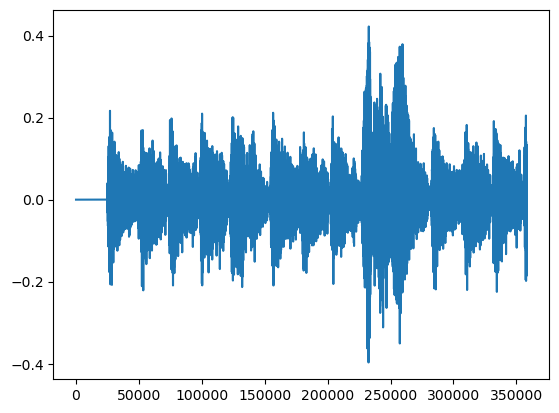

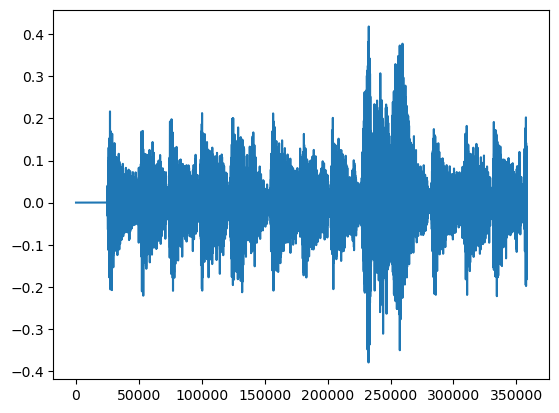

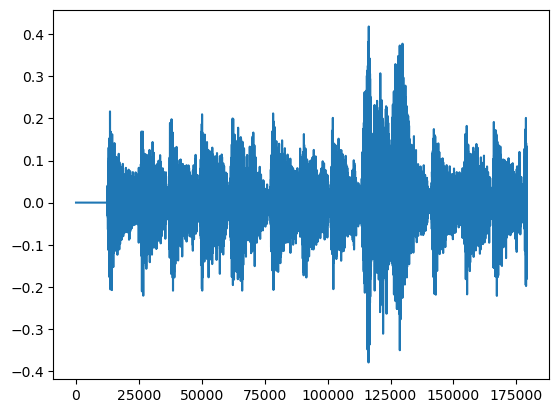

In [128]:
plt.plot(np.arange(len(tribe_samps)),tribe_samps)
plt.show();
plt.plot(np.arange(len(tribe_samps)),reconstructed)
plt.show();
plt.plot(np.arange(len(hlv_trb)),hlv_trb)
plt.show();

In [134]:
freq_recon,freq_recon_ = samples_to_freq(reconstructed)
freq_orig,freq_orig_ = samples_to_freq(tribe_samps)

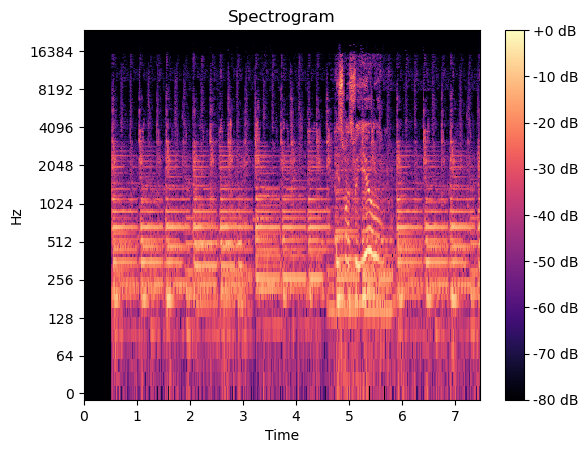

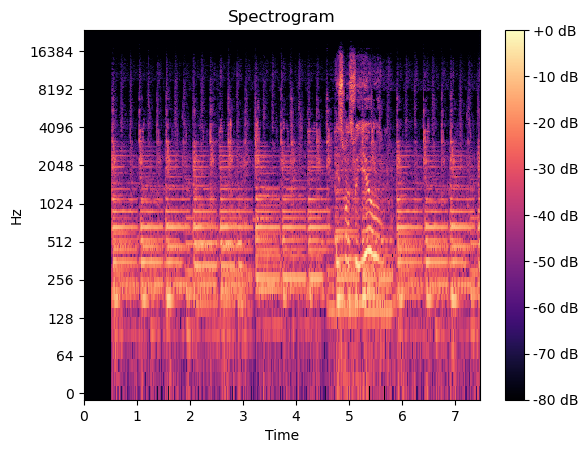

In [130]:
graph_spectro(freq_orig,sr)
graph_spectro(freq_recon,sr)

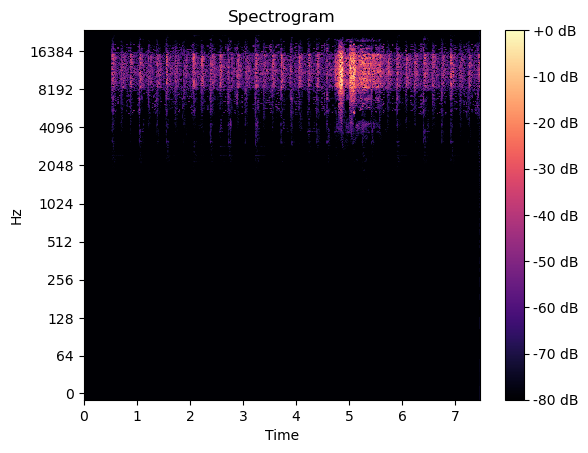

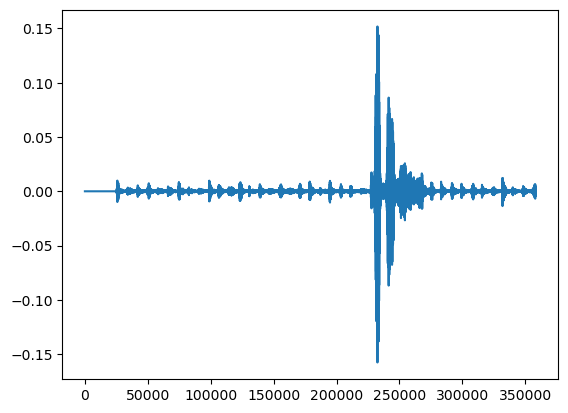

In [135]:
diff_ = freq_orig_-freq_recon_
diff = freq_orig-freq_recon
graph_spectro(diff,sr)
diff_samples = freq_to_samples(diff_)
plt.plot(np.arange(len(diff_samples)),diff_samples)
plt.show();

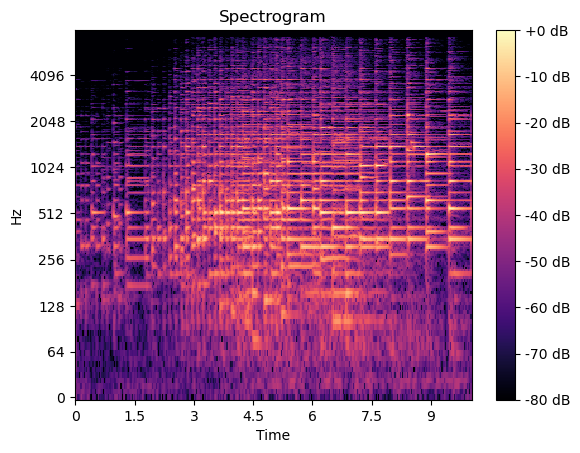

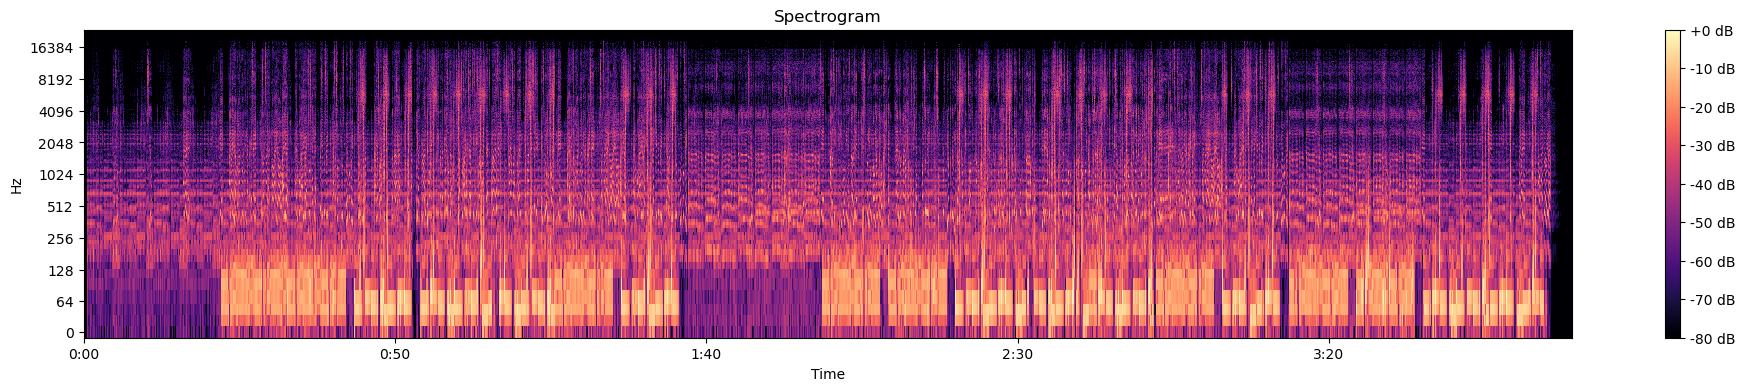

In [58]:
lazy_graph('samples/sample-4.mp3')
# lazy_graph('samples/sample-3.mp3')
# lazy_graph("samples/Bas - Tribe with J.Cole.mp3",figsize=(24,4),save_n='tribe_4x24.png')

In [ ]:

mp3_to_samples("samples/sample-0.mp3")

[ 0.12174022  0.13357437  0.1425333   0.12861744  0.1174749   0.09759119
  0.06819761  0.03692567  0.00519656 -0.02640987 -0.05257246 -0.08624487
 -0.10514335 -0.10771921 -0.10030858 -0.08225829 -0.0731055  -0.06751895
 -0.08109911 -0.10482843 -0.14708886 -0.18663234 -0.2046332  -0.20017652
 -0.18188314 -0.1462491  -0.10558275 -0.06802654 -0.04997054 -0.05569067
 -0.05821013 -0.06280223 -0.06003356 -0.05061488 -0.03465146 -0.00850118
  0.0137814   0.03635121  0.04571941  0.06437021  0.08110711  0.10493577
  0.10358478  0.09575214  0.07937923  0.05719186  0.02166618 -0.0029574
 -0.00844871  0.01128618]


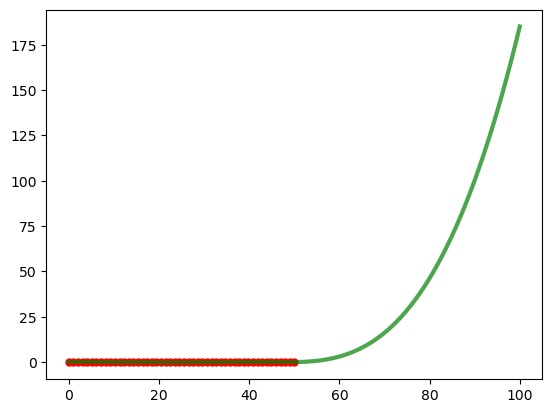

In [108]:
rng = np.random.default_rng()

x = np.linspace(0, 50, 50)
print(hlv_trb[50000:50050])
y = hlv_trb[50000:50050]

spl = InterpolatedUnivariateSpline(x, y)

plt.plot(x, y, 'ro', ms=5)

xs = np.linspace(0, 100, 100) #np.linspace(-3, 3, 1000

plt.plot(xs, spl(xs), 'g', lw=3, alpha=0.7)

plt.show()

In [117]:
np.linspace(0, 100, 100).astype(int)

print(np.arange(0, 100).astype(int))
np.arange(0, 200, 2).astype(int)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])